In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 


plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [2]:
df = pd.read_csv("adverts.csv")

In [3]:
df.duplicated(subset=['public_reference'], keep=False).sum()

0

____________________
# <font size = "10" style="color:purple; font-weight:bold;">Data Preprocessing</span>

Dropping useless (id) columns

In [4]:
temp_df = df.copy().drop('public_reference', axis=1)
dropped_df = temp_df.drop("reg_code", axis=1)

Retreiving numerical and categorical columns

In [5]:
categorical_columns = dropped_df.select_dtypes(include=['object']).columns
numeric_columns = dropped_df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns, categorical_columns

(Index(['mileage', 'year_of_registration', 'price'], dtype='object'),
 Index(['standard_colour', 'standard_make', 'standard_model',
        'vehicle_condition', 'body_type', 'fuel_type'],
       dtype='object'))

In [6]:
dropped_df['vehicle_condition'].unique()

array(['NEW', 'USED'], dtype=object)

Checking for negatives

In [7]:
negative_values = (dropped_df[numeric_columns] < 0).any()

print("Columns with negative values:")
print(negative_values[negative_values].index.tolist())

Columns with negative values:
[]



# <font size = "5" style="color:purple; font-weight:bold;">Categorical Encoding using Catboost encoding & JamesStein encoding</span>

1 - Mapping vehicle condition values to binary

2 - Keeping flag columns for whether the cars are sedan or hatchback

3 - Using two encoding techniques on remaining categoricals: Catboost encoding & JamesStein encoding (replacing categorical values with mean of target variable)


In [9]:
import category_encoders
print(category_encoders.__version__)

2.6.3


In [10]:
import category_encoders as ce

encoded_df = dropped_df.copy()

encoded_df['vehicle_condition'] = dropped_df['vehicle_condition'].map({'NEW': 1, 'USED': 0})

encoded_df['is_sedan'] = (dropped_df['body_type'] == 'Saloon').astype(int)
encoded_df['is_hatchback'] = (dropped_df['body_type'] == 'Hatchback').astype(int)

columns_to_encode = ['standard_model', 'standard_make', 'standard_colour', 'fuel_type', 'body_type']

if any(col in encoded_df.columns for col in columns_to_encode):
    for col in columns_to_encode:
        catboost_encoder = ce.CatBoostEncoder()
        encoded_df[col + '_encoded'] = catboost_encoder.fit_transform(encoded_df[col], encoded_df['price'])

        james_stein_encoder = ce.JamesSteinEncoder()
        encoded_df[col + '_jse_encoded'] = james_stein_encoder.fit_transform(encoded_df[col], encoded_df['price'])

encoded_df = encoded_df.drop(columns=columns_to_encode)

encoded_df[['crossover_car_and_van']] = dropped_df[['crossover_car_and_van']].astype(int)


(array([False, False, False, ..., False, False, False]), 0)
(array([False, False, False, ..., False, False, False]), 0)
{'key': nan}
{'key': -1}
{'key': -2}
(array([False, False, False, ..., False, False, False]), 0)
(array([False, False, False, ..., False, False, False]), 0)
{'key': nan}
{'key': -1}
{'key': -2}
(array([False, False, False, ..., False, False, False]), 0)
(array([False, False, False, ..., False, False, False]), 0)
{'key': -1}
{'key': -2}
(array([False, False, False, ..., False, False, False]), 0)
(array([False, False, False, ..., False, False, False]), 0)
{'key': -1}
{'key': -2}
(array([False, False, False, ..., False, False, False]), 0)
(array([False, False, False, ..., False, False, False]), 0)
{'key': -1}
{'key': -2}


In [11]:
encoded_df

,mileage,vehicle_condition,year_of_registration,price,crossover_car_and_van,is_sedan,is_hatchback,standard_model_encoded,standard_model_jse_encoded,standard_make_encoded,standard_make_jse_encoded,standard_colour_encoded,standard_colour_jse_encoded,fuel_type_encoded,fuel_type_jse_encoded,body_type_encoded,body_type_jse_encoded
0,0.0,1,NaN,73970,0,0,0,17341.965799,36707.836265,17341.965799,24160.680374,17341.965799,18549.100640,17341.965799,26864.016945,17341.965799,21930.036180
1,108230.0,0,2011.0,7000,0,1,0,17341.965799,16158.094022,17341.965799,25026.674313,17341.965799,17082.525581,17341.965799,16552.627709,17341.965799,19047.363767
2,7800.0,0,2017.0,14000,0,0,0,17341.965799,10597.411303,17341.965799,13776.051214,45655.982899,18549.100640,17341.965799,16969.700120,45655.982899,21930.036180
3,45000.0,0,2016.0,7995,0,0,1,17341.965799,7842.375929,17341.965799,8275.689415,17341.965799,13462.957732,12170.982899,16552.627709,17341.965799,10587.726281
4,64000.0,0,2015.0,26995,0,0,0,17341.965799,36231.171138,17341.965799,31985.696839,35103.988600,18549.100640,10778.988600,16552.627709,35103.988600,21930.036180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402000,5179.0,0,2019.0,10595,0,0,1,9347.792914,9453.260619,9935.854747,10105.303848,20036.712342,18549.100640,16620.605298,16969.700120,10437.977933,10587.726281
402001,110000.0,0,2009.0,2000,0,0,1,2730.092044,2716.433481,9935.898223,10105.303848,15144.227922,16361.162909,16620.577521,16969.700120,10437.978872,10587.726281
402002,52760.0,0,2012.0,7250,0,0,0,12787.187154,12840.946163,11420.965261,11552.255920,16799.098192,17020.517926,16620.510123,16969.700120,22477.838546,21930.036180
402003,10250.0,0,2015.0,11490,0,0,1,16118.480446,16127.205069,15468.912417,15495.864849,15143.915143,16361.162909,16620.466927,16969.700120,10437.928440,10587.726281


Creating a new numeric_cols as some categorical variables are now encoded

In [12]:
numeric_cols = encoded_df.select_dtypes(include=['float64', 'int64']).copy()

Deciding whether to use MatrixFactorization for year of registration depending on its intercorrelation with other variables

In [13]:
correlation_matrix = numeric_cols.corr(method='pearson')

year_reg_corr = correlation_matrix['year_of_registration'].drop('year_of_registration')

print(year_reg_corr.sort_values(ascending=False))


price                          0.102341
standard_colour_jse_encoded    0.073378
fuel_type_jse_encoded          0.061392
fuel_type_encoded              0.057720
standard_model_jse_encoded     0.055497
standard_colour_encoded        0.053695
body_type_jse_encoded          0.030007
standard_model_encoded         0.022491
standard_make_jse_encoded     -0.005606
body_type_encoded             -0.016650
standard_make_encoded         -0.030207
mileage                       -0.375541
vehicle_condition                   NaN
Name: year_of_registration, dtype: float64



# <font size = "5" style="color:purple; font-weight:bold;">Feature Ranking and Selection using:
- Recursive Feature Elimination 
- SelectKBest (f_regression, mutual_info_regression) </span>

Identifying best categorical encoded representations and dropping the rest.

Columns dropped early on as MF takes too long and redundant features already established early on as shown in report. 

In [14]:
temp_df = encoded_df.dropna().sample(10000,random_state=1)

Recursive Feature Elimination (RFE)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import xgboost as xgb

X = temp_df.drop(columns=['price'], axis=1)
y = temp_df['price']
y = y.astype(int)

X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2)

rfe = RFE(estimator=xgb.XGBRegressor(), 
          n_features_to_select=None) # Not priority currently. Will manually drop after comapring different selectors

rfe.fit(X_train, y_train)

feature_ranking = rfe.ranking_

selected_features = rfe.support_

In [16]:
print(rfe.ranking_) 
print(rfe.support_)

[1 9 1 8 1 7 1 1 2 1 1 3 1 4 6 5]
[ True False  True False  True False  True  True False  True  True False
  True False False False]


In [17]:
feature_names = X_train.columns.tolist()

ranking_dict = dict(zip(feature_names, rfe.ranking_))

ranking_dict = dict(sorted(ranking_dict.items(), key=lambda x: x[1]))

print("Feature Rankings:")
for feature, ranking in ranking_dict.items():
    print(f"{feature}: {ranking}")

selected_feature_names = [feature for feature, selected in zip(feature_names, rfe.support_) if selected]

print("\nSelected Features:")
print(selected_feature_names)

Feature Rankings:
mileage: 1
year_of_registration: 1
is_sedan: 1
standard_model_encoded: 1
standard_model_jse_encoded: 1
standard_make_jse_encoded: 1
standard_colour_encoded: 1
fuel_type_encoded: 1
standard_make_encoded: 2
standard_colour_jse_encoded: 3
fuel_type_jse_encoded: 4
body_type_jse_encoded: 5
body_type_encoded: 6
is_hatchback: 7
crossover_car_and_van: 8
vehicle_condition: 9

Selected Features:
['mileage', 'year_of_registration', 'is_sedan', 'standard_model_encoded', 'standard_model_jse_encoded', 'standard_make_jse_encoded', 'standard_colour_encoded', 'fuel_type_encoded']


SelectKBest with f regression

In [18]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k='all')


selector.fit(X, y)

feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_, 'Percentage %': selector.scores_/selector.scores_.sum() * 100})

feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print(feature_scores)

                        Feature         Score  Percentage %
6        standard_model_encoded  26348.149570     51.644041
8         standard_make_encoded   9757.604934     19.125523
7    standard_model_jse_encoded   9292.744977     18.214369
9     standard_make_jse_encoded   1723.506390      3.378182
14            body_type_encoded    966.768466      1.894927
0                       mileage    945.729051      1.853689
15        body_type_jse_encoded    764.130434      1.497744
5                  is_hatchback    625.102050      1.225240
2          year_of_registration    206.400294      0.404558
12            fuel_type_encoded    103.710346      0.203279
13        fuel_type_jse_encoded     97.744716      0.191586
10      standard_colour_encoded     96.914934      0.189959
11  standard_colour_jse_encoded     77.643569      0.152186
4                      is_sedan      9.667825      0.018950
3         crossover_car_and_van      2.942550      0.005768
1             vehicle_condition      0.0

SelectKBest with mutual info regression

In [19]:
from sklearn.feature_selection import mutual_info_regression

selector = SelectKBest(score_func=mutual_info_regression, k='all')

selector.fit(X, y)

feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_, 'Percentage %': selector.scores_/selector.scores_.sum() * 100})

feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print(feature_scores)


                        Feature     Score  Percentage %
7    standard_model_jse_encoded  0.560703     20.284411
6        standard_model_encoded  0.521457     18.864633
2          year_of_registration  0.441897     15.986418
0                       mileage  0.273818      9.905864
8         standard_make_encoded  0.240384      8.696304
9     standard_make_jse_encoded  0.235634      8.524484
15        body_type_jse_encoded  0.126798      4.587134
14            body_type_encoded  0.119741      4.331854
5                  is_hatchback  0.096622      3.495481
13        fuel_type_jse_encoded  0.050231      1.817180
11  standard_colour_jse_encoded  0.034234      1.238482
12            fuel_type_encoded  0.033104      1.197597
4                      is_sedan  0.016725      0.605064
10      standard_colour_encoded  0.008598      0.311055
3         crossover_car_and_van  0.004258      0.154039
1             vehicle_condition  0.000000      0.000000


Better performing categorical encodings are:
- standard colour CatBoost
- body type JSE
- standard make JSE
- fuel type CatBoost
- standard model CatBoost

As is apparent, catboostencoding works better than JS encoding at improving predictive capability of the model for the features

Additionally Removing the following:
- is_sedan 
- crossover_car_and_van 

In [20]:
encoded_features_to_drop = [
    'standard_colour_jse_encoded',
    'body_type_encoded',
    'standard_make_encoded',
    'fuel_type_jse_encoded',
    'standard_model_jse_encoded',
    'is_sedan', 
    'crossover_car_and_van'
]

selected_df = encoded_df.drop(columns=encoded_features_to_drop)



# <font size = "5" style="color:purple; font-weight:bold;">Null Imputation using Forward Fill and MatrixFactorization</span>

Will avoid using MatrixFactorization for year_of_registration as it has a weaker correlation. Can use ForwardFill instead.


In [21]:
selected_df

,mileage,vehicle_condition,year_of_registration,price,is_hatchback,standard_model_encoded,standard_make_jse_encoded,standard_colour_encoded,fuel_type_encoded,body_type_jse_encoded
0,0.0,1,NaN,73970,0,17341.965799,24160.680374,17341.965799,17341.965799,21930.036180
1,108230.0,0,2011.0,7000,0,17341.965799,25026.674313,17341.965799,17341.965799,19047.363767
2,7800.0,0,2017.0,14000,0,17341.965799,13776.051214,45655.982899,17341.965799,21930.036180
3,45000.0,0,2016.0,7995,1,17341.965799,8275.689415,17341.965799,12170.982899,10587.726281
4,64000.0,0,2015.0,26995,0,17341.965799,31985.696839,35103.988600,10778.988600,21930.036180
...,...,...,...,...,...,...,...,...,...,...
402000,5179.0,0,2019.0,10595,1,9347.792914,10105.303848,20036.712342,16620.605298,10587.726281
402001,110000.0,0,2009.0,2000,1,2730.092044,10105.303848,15144.227922,16620.577521,10587.726281
402002,52760.0,0,2012.0,7250,0,12787.187154,11552.255920,16799.098192,16620.510123,21930.036180
402003,10250.0,0,2015.0,11490,1,16118.480446,15495.864849,15143.915143,16620.466927,10587.726281


In [22]:

from sklearn.ensemble import IsolationForest
time_column = 'year_of_registration'
selected_df.sort_values(by=time_column, inplace=True)

selected_df[time_column] = selected_df[time_column].ffill()

missing_values_count = selected_df[time_column].isnull().sum()

print("Number of missing values remaining:", missing_values_count)


Number of missing values remaining: 0


In [23]:
preprocessing = False

BiScaler scales the data such that both rows and columns have a mean of 0 and a standard deviation of 1

In [24]:
from fancyimpute import BiScaler, MatrixFactorization

if preprocessing:
    X = selected_df.values  

    bi_scaler = BiScaler()
    print("Fitting BiScaler...")
    X_scaled = bi_scaler.fit_transform(X)


In [25]:
if preprocessing:
    matrix_factorization = MatrixFactorization(shrinkage_value=0.2, rank=20)

    X_imputed = matrix_factorization.fit_transform(X_scaled)

    X_imputed_original = bi_scaler.inverse_transform(X_imputed)

    df_imputed = pd.DataFrame(X_imputed_original, columns=selected_df.columns)
    df_imputed.to_csv('df_imputed.csv', index=False)


- MatrixFactorization decomposes data matrix into two lower-rank matrices, which are such that when multiplied together, they approximate original data matrix.

- Missing values in original data matrix then filled using product of the decomposed matrices.

In [26]:
df_imputed = pd.read_csv('df_imputed.csv')


# <font size = "5" style="color:purple; font-weight:bold;">Outlier Identification using IsolationForest</span>

Using isolation forest to predict outliers

In [27]:
isolation_forest = IsolationForest(contamination=0.1) 
# CAN ADJUST CONTAMINATION RATE
isolation_forest.fit(df_imputed[numeric_columns])

outlier_preds = isolation_forest.predict(df_imputed[numeric_columns])

outlier_percentage = (outlier_preds == -1).mean() * 100

print(f"Percentage of outliers: {outlier_percentage:.2f}%")
filtered_df = df_imputed[outlier_preds == 1]

Percentage of outliers: 10.00%


In [28]:
import plotly.graph_objects as go
import plotly.express as px
from sklearn.ensemble import IsolationForest

temp_df = df_imputed.sample(1000, random_state=12)

feature1 = 'mileage'
feature2 = 'price'

isolation_forest = IsolationForest(contamination=0.1)
isolation_forest.fit(temp_df[[feature1, feature2]])

fig = px.scatter(temp_df, x=feature1, y=feature2, color=isolation_forest.predict(temp_df[[feature1, feature2]]), color_discrete_map={1: 'blue', -1: 'red'})
fig.update_traces(marker=dict(size=5), selector=dict(mode='markers'))

xx, yy = np.meshgrid(np.linspace(temp_df[feature1].min(), temp_df[feature1].max(), 100), np.linspace(temp_df[feature2].min(), temp_df[feature2].max(), 100))
Z = isolation_forest.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig.add_trace(go.Contour(x=xx[0], y=yy[:, 0], z=Z, showscale=False, colorscale='Viridis', opacity=0.5, line=dict(width=2, color='black')))

fig.update_layout(xaxis_title=feature1, yaxis_title=feature2, title='Isolation Forest Decision Boundary')
fig.show()



# <font size = "5" style="color:purple; font-weight:bold;">Box Cox Transformation</span>

In [29]:
from scipy.stats import boxcox

filtered_df = filtered_df[(filtered_df['mileage'] >= 0) & (filtered_df['mileage'].notnull())]

epsilon = 1e-6 # Very tiny epsilon value used here to prevent negative values
filtered_df['mileage'] += epsilon

filtered_df['price_boxcox'], _ = boxcox(filtered_df['price'])
filtered_df['mileage_boxcox'], _ = boxcox(filtered_df['mileage'])

filtered_df = filtered_df[filtered_df['year_of_registration'] >= 1950]

filtered_df.head()


,mileage,vehicle_condition,year_of_registration,price,is_hatchback,standard_model_encoded,standard_make_jse_encoded,standard_colour_encoded,fuel_type_encoded,body_type_jse_encoded,price_boxcox,mileage_boxcox
6022,68000.000001,0.000000e+00,2004.0,3775.0,0.000000e+00,15214.705212,19694.402817,13358.923894,16756.360073,20238.967427,27.355063,115.370331
6054,85040.000001,3.552714e-15,2004.0,6490.0,-2.220446e-16,24093.101210,21018.624230,13449.545364,16665.752321,20238.967427,31.903888,124.415466
6059,83400.000001,0.000000e+00,2004.0,2995.0,-2.220446e-16,18893.370454,19694.402817,18514.411213,16462.374697,19047.363767,25.592174,123.601036
6102,76000.000001,5.329071e-15,2004.0,2750.0,-1.998401e-15,8310.321933,11552.255920,13178.714779,16426.720701,11555.987705,24.967469,119.786170
6116,85000.000001,0.000000e+00,2004.0,4295.0,1.554312e-15,4269.577147,21944.246036,13263.797339,16443.414393,21930.036180,28.383194,124.395728


In [30]:
filtered_df.isnull().any()
# No remaining null values 

mileage                      False
vehicle_condition            False
year_of_registration         False
price                        False
is_hatchback                 False
standard_model_encoded       False
standard_make_jse_encoded    False
standard_colour_encoded      False
fuel_type_encoded            False
body_type_jse_encoded        False
price_boxcox                 False
mileage_boxcox               False
dtype: bool

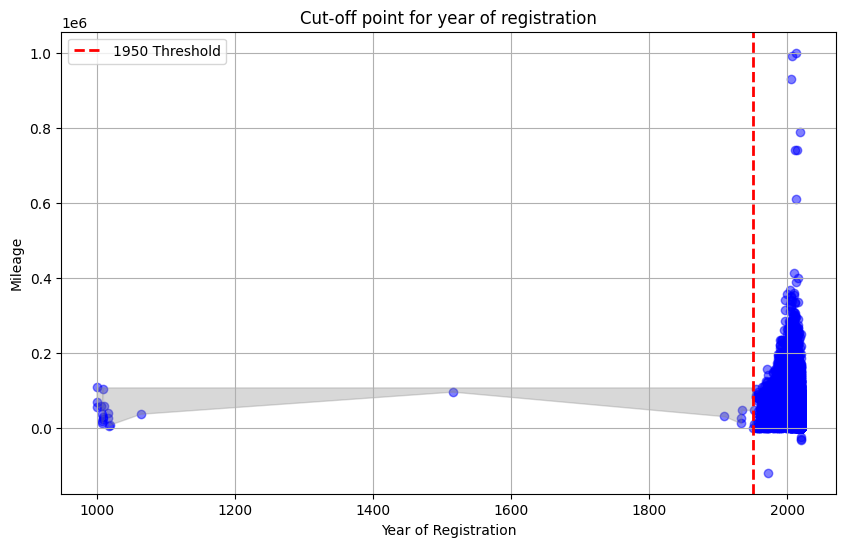

In [31]:
import matplotlib.pyplot as plt

year_of_registration = df_imputed['year_of_registration']
mileage = df_imputed['mileage']

plt.figure(figsize=(10, 6))

plt.scatter(year_of_registration, mileage, color='blue', alpha=0.5)
plt.axvline(x=1950, color='red', linestyle='--', linewidth=2, label='1950 Threshold')
plt.fill_betweenx(mileage, year_of_registration, 1950, where=(year_of_registration < 1950), color='gray', alpha=0.3)

plt.title('Cut-off point for year of registration')
plt.xlabel('Year of Registration')
plt.ylabel('Mileage')
plt.grid(True)
plt.legend()

plt.show()


In [32]:
(filtered_df[numeric_columns] < 0).sum() 
# No negative values

mileage                 0
year_of_registration    0
price                   0
dtype: int64

Visual demonstration of the transformed values:

In [33]:
# Post outlier-dropping:
print(round(filtered_df.shape[0]/df.shape[0] * 100), "% columns retained" )

89 % columns retained


In [34]:
filtered_df.columns

Index(['mileage', 'vehicle_condition', 'year_of_registration', 'price',
       'is_hatchback', 'standard_model_encoded', 'standard_make_jse_encoded',
       'standard_colour_encoded', 'fuel_type_encoded', 'body_type_jse_encoded',
       'price_boxcox', 'mileage_boxcox'],
      dtype='object')

In [35]:
len(filtered_df.columns)

12


# <font size = "5" style="color:purple; font-weight:bold;">Capturing Feature Relations using PolynomialFeatures</span>

In [47]:

selector = SelectKBest(score_func=mutual_info_regression)
selector.fit(filtered_df, y)

feature_scores = selector.scores_
feature_names = filtered_df.columns

feature_rankings = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores})
feature_rankings


,Feature,Score
0,mileage,0.390937
1,vehicle_condition,0.114091
2,year_of_registration,0.495897
3,price,7.737401
4,is_hatchback,0.100331
5,standard_model_encoded,0.489506
6,standard_make_jse_encoded,0.290193
7,standard_colour_encoded,0.025972
8,fuel_type_encoded,0.047633
9,body_type_jse_encoded,0.144313


BoxCox columns have lower ranking relative to originals, so they're dropped

In [70]:
temp_df = filtered_df.drop(columns=['price_boxcox','mileage_boxcox'])

In [71]:
temp_df.columns

Index(['mileage', 'vehicle_condition', 'year_of_registration', 'price',
       'is_hatchback', 'standard_model_encoded', 'standard_make_jse_encoded',
       'standard_colour_encoded', 'fuel_type_encoded',
       'body_type_jse_encoded'],
      dtype='object')

In [72]:
from sklearn.preprocessing import PolynomialFeatures

features_df = temp_df.drop(columns=['price'])

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_features = poly.fit_transform(features_df)
poly_feature_names = poly.get_feature_names_out(features_df.columns)

poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

y = temp_df['price']

k = 3
selector = SelectKBest(score_func=mutual_info_regression, k=k)
selector.fit(poly_df, y)

cols_to_keep = poly_df.columns[selector.get_support(indices=True)]

selected_poly_df = poly_df[cols_to_keep]
result_df = pd.concat([features_df, selected_poly_df], axis=1)

result_df.columns

Index(['mileage', 'vehicle_condition', 'year_of_registration', 'is_hatchback',
       'standard_model_encoded', 'standard_make_jse_encoded',
       'standard_colour_encoded', 'fuel_type_encoded', 'body_type_jse_encoded',
       'year_of_registration standard_model_encoded',
       'year_of_registration standard_make_jse_encoded',
       'year_of_registration body_type_jse_encoded'],
      dtype='object')

In [79]:
result_df['price'] = y # Retreiving the price column 

In [96]:
result_df.isnull().sum() # Null values somehow created during the process

mileage                                           35357
vehicle_condition                                 35357
year_of_registration                              35357
is_hatchback                                      35357
standard_model_encoded                            35357
standard_make_jse_encoded                         35357
standard_colour_encoded                           35357
fuel_type_encoded                                 35357
body_type_jse_encoded                             35357
year_of_registration standard_model_encoded       35357
year_of_registration standard_make_jse_encoded    35357
year_of_registration body_type_jse_encoded        35357
price                                             35357
dtype: int64

In [83]:
print("Columns added:", set(result_df.columns)-set(temp_df.columns)) 

Columns added: {'year_of_registration standard_make_jse_encoded', 'year_of_registration body_type_jse_encoded', 'year_of_registration standard_model_encoded'}


Checking rankings of relevant poly features kept along with originals.

In [74]:
feature_scores = selector.scores_
feature_names = poly_df.columns

feature_rankings = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores})
feature_rankings.sort_values(by='Score', ascending=False).head(13)  

,Feature,Score
29,year_of_registration standard_make_jse_encoded,1.034427
32,year_of_registration body_type_jse_encoded,0.731221
28,year_of_registration standard_model_encoded,0.515418
26,year_of_registration^2,0.496826
2,year_of_registration,0.494538
39,standard_model_encoded^2,0.493963
42,standard_model_encoded fuel_type_encoded,0.490341
4,standard_model_encoded,0.489392
40,standard_model_encoded standard_make_jse_encoded,0.484521
43,standard_model_encoded body_type_jse_encoded,0.479638



# <font size = "5" style="color:purple; font-weight:bold;">Dimensionality Reduction:
- Visualization using t-distributed Stochastic Neighbor Embedding (t-SNE)
- Processing using Sparse Random Projection</span>

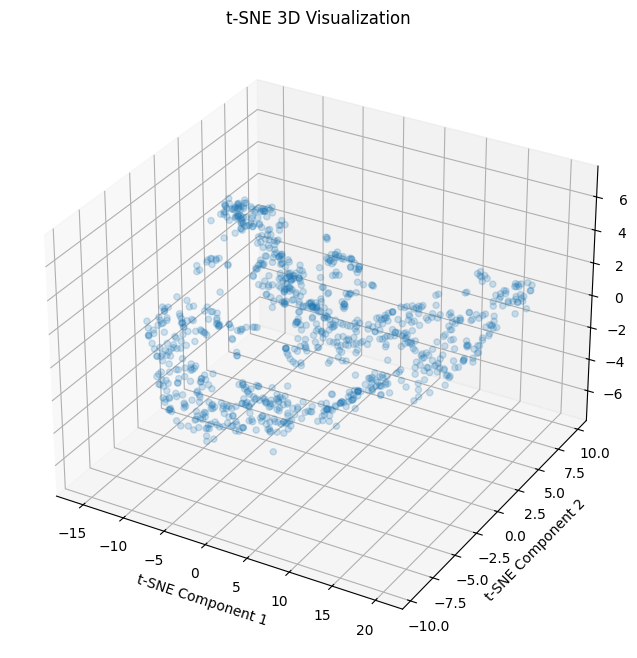

In [84]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X = filtered_df.drop(columns=['price','price_boxcox'])

tsne = TSNE(n_components=3)

X_tsne = tsne.fit_transform(X.sample(1000, random_state=4))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], alpha=0.2)

ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('t-SNE 3D Visualization')

plt.show() 



# <font size = "5" style="color:purple; font-weight:bold;">Data Scaling using Robust Scaler</span>

In [98]:

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(result_df.dropna()), columns=result_df.columns)


In [99]:
X = df_scaled.drop(columns=['price'], axis=1)
y = df_scaled['price']


In [100]:
X

,mileage,vehicle_condition,year_of_registration,is_hatchback,standard_model_encoded,standard_make_jse_encoded,standard_colour_encoded,fuel_type_encoded,body_type_jse_encoded,year_of_registration standard_model_encoded,year_of_registration standard_make_jse_encoded,year_of_registration body_type_jse_encoded
0,0.905721,0.000,-3.0,-1.554312e-15,0.251128,0.731885,-1.096177,2.783288,0.353387,2.086528,0.876987,0.400029
1,1.325395,1.000,-3.0,-1.776357e-15,1.235174,0.880562,-1.067681,1.777452,0.353387,-0.098166,-0.389099,0.494553
2,1.285004,0.000,-3.0,-1.776357e-15,0.658857,0.731885,0.524989,-0.480240,0.248329,-0.935811,0.870995,0.345913
3,1.102751,1.500,-3.0,-3.552714e-15,-0.514127,-0.182272,-1.152845,-0.876035,-0.412152,0.099010,0.769522,0.400029
4,1.324410,0.000,-3.0,0.000000e+00,-0.961988,0.984486,-1.126090,-0.690719,0.502481,0.088799,0.095953,-0.502401
...,...,...,...,...,...,...,...,...,...,...,...,...
322668,-0.645888,0.250,1.0,-1.776357e-15,0.420226,-0.017026,0.688000,-1.160882,0.502481,0.231808,0.736638,0.252019
322669,-0.745290,1.500,1.0,0.000000e+00,0.814089,-0.058854,2.779092,-1.076376,0.502481,0.046161,-0.553720,0.507038
322670,-0.766569,-0.500,1.0,0.000000e+00,1.678745,-0.017026,1.013957,1.230395,0.502481,0.878309,0.784151,0.507038
322671,-0.683693,0.000,1.0,1.000000e+00,-0.321705,0.105533,0.005869,1.230806,-0.497519,0.961934,-0.156329,0.507038


Grid-like search to identify ideal number of n_components to dimensionally reduce to. t-SNE not utilized for processing as its method 'exact' has a time-complexity of O(N^2), where N is number of rows

SparseRandomProjection ideal for large, high-dimensional data matrices

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.random_projection import SparseRandomProjection

n_components_range = [1,2,3,4,5,6,7,8,9,10]
mae_scores = []

for i, n_components in enumerate(n_components_range):
    print("RUN: ", i)
    sparse_random_projection = SparseRandomProjection(n_components=n_components, random_state=1)
    
    print('Transforming...')
    X_projected = sparse_random_projection.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_projected, y, test_size=0.2, random_state=1)
    regressor = xgb.XGBRegressor()

    print('Fitting...')
    regressor.fit(X_train, y_train)

    print('Testing...')
    y_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

for i, n_components in enumerate(n_components_range):
    print(f"MAE for n_components={n_components}: {mae_scores[i]}")


RUN:  0
Transforming...
Fitting...
Testing...
RUN:  1
Transforming...
Fitting...
Testing...
RUN:  2
Transforming...
Fitting...
Testing...
RUN:  3
Transforming...
Fitting...
Testing...
RUN:  4
Transforming...
Fitting...
Testing...
RUN:  5
Transforming...
Fitting...
Testing...
RUN:  6
Transforming...
Fitting...
Testing...
RUN:  7
Transforming...
Fitting...
Testing...
RUN:  8
Transforming...
Fitting...
Testing...
RUN:  9
Transforming...
Fitting...
Testing...
MAE for n_components=1: 0.6153335203573802
MAE for n_components=2: 0.5737975911815807
MAE for n_components=3: 0.5328025163871459
MAE for n_components=4: 0.4059063506538205
MAE for n_components=5: 0.44263525124216324
MAE for n_components=6: 0.3170827968836218
MAE for n_components=7: 0.2908944155715366
MAE for n_components=8: 0.2053922424424254
MAE for n_components=9: 0.3242948446649039
MAE for n_components=10: 0.19523299686052414


As fewer components naturally reduces accuracy for reduced explained variance, n_components of 10 is selected due to larger n_components values having little improvement on MAE, whereas smaller ones from this point increase MAE significantly 

In [109]:
sparse_random_projection = SparseRandomProjection(n_components=10, random_state=1)

print('Transforming...')
X_projected = sparse_random_projection.fit_transform(X)
X_projected


Transforming...


array([[-2.28332188, -2.14377439,  0.11487757, ...,  1.61789331,
        -0.95959997, -0.19531975],
       [-1.67454911, -1.74314543,  0.73875062, ...,  1.03871668,
         0.31850793, -0.8157582 ],
       [ 0.591644  , -0.4162216 ,  2.12936413, ...,  1.37791787,
        -0.86238877, -0.22717027],
       ...,
       [-0.12738816, -0.27031   , -1.9169249 , ..., -1.57661892,
        -1.3499768 ,  0.6027296 ],
       [-0.13239062,  0.85780242, -0.66790055, ..., -0.39922157,
         0.08640715,  0.23631239],
       [ 1.07796305,  0.47581567,  0.04318862, ..., -0.55915664,
         0.03080979, -0.11129843]])

____________________
# <font size = "10" style="color:purple; font-weight:bold;">Model Building, HyperParameter Tuning and Cross-Validation</span>


# <font size = "5" style="color:purple; font-weight:bold;">Stacking Ensemble Model Building using:
- Linear Regression Model || Lasso Regressor
- Random Forest Model || Extra Trees Regressor
- Gradient Boosting Model || LGBMRegressor
- Ensemble Model || Stacking Regressor
</span>

In [110]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import ExtraTreesRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.datasets import make_regression

X_train, X_test, y_train, y_test = train_test_split(X_projected, y, test_size=0.2, random_state=1)

# Lasso 
lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_mae = mean_absolute_error(y_test, lasso_pred)

# Extremely Randomized 
extra_trees = ExtraTreesRegressor(n_estimators=100, random_state=1)  
extra_trees.fit(X_train, y_train)
extra_trees_pred = extra_trees.predict(X_test)
extra_trees_mae = mean_absolute_error(y_test, extra_trees_pred)

# LightGBM
lgbm = LGBMRegressor(n_estimators=100, random_state=1)  
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)
lgbm_mae = mean_absolute_error(y_test, lgbm_pred)

"""
Base estimators which will be stacked together. 
Each element of the list is defined as a tuple of string (i.e. name) and an estimator instance. 
"""

# Stacked Generalization Ensemble
estimators = [('lasso', lasso),
              ('extra_trees', extra_trees),
              ('lgbm', lgbm)]

stacked_model = StackingRegressor(estimators=estimators,
            final_estimator=Lasso(alpha=0.1))               # CAN CHANGE FINAL ESTIMATOR
stacked_model.fit(X_train, y_train)
stacked_pred = stacked_model.predict(X_test)
stacked_mae = mean_absolute_error(y_test, stacked_pred)
stacked_score = stacked_model.score(X_test, y_test)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003703 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 258138, number of used features: 10
[LightGBM] [Info] Start training from score 0.185869
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 258138, number of used features: 10
[LightGBM] [Info] Start training from score 0.185869
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004881 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 206510, number of used features: 10
[LightGBM] [Info] Start 

In [111]:
lasso_score = lasso.score(X_test, y_test)
print("Lasso Regression R^2 Score:", lasso_score)
print("Lasso Regression MAE:", lasso_mae)
print()

extra_trees_score = extra_trees.score(X_test, y_test)
print("Extra Trees R^2 Score:", extra_trees_score)
print("Extra Trees MAE:", extra_trees_mae)
print()

lgbm_score = lgbm.score(X_test, y_test)
print("LightGBM R^2 Score:", lgbm_score)
print("LightGBM MAE:", lgbm_mae)
print()

print("Stacked Generalization R^2 Score:", stacked_score)
print("Stacked Generalization MAE:", stacked_mae)

Lasso Regression R^2 Score: 0.7246842875352923
Lasso Regression MAE: 0.3145075029113332

Extra Trees R^2 Score: 0.8897096594986437
Extra Trees MAE: 0.18458713035139285

LightGBM R^2 Score: 0.8710898257903569
LightGBM MAE: 0.20396793420297787

Stacked Generalization R^2 Score: 0.8665844742468798
Stacked Generalization MAE: 0.21283938303610414



# <font size = "5" style="color:purple; font-weight:bold;">HyperParameter Tuning using Bayesian Optimization</span>

In [117]:
tuning = False

In [124]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
if tuning:
    lasso_param_space = {
        'alpha': Real(0.01, 5.0, prior='log-uniform')  
    }

    extra_trees_param_space = {
        'n_estimators': Integer(100, 150),  
        'max_depth': Integer(5, 15),  
        'min_samples_split': Integer(5, 15),  
        'min_samples_leaf': Integer(2, 8)  
    }

    lgbm_param_space = {
        'n_estimators': Integer(100, 130),  
        'max_depth': Integer(5, 10),  
        'learning_rate': Real(0.1, 0.3, prior='log-uniform')  
    }

    stacked_param_space = {
        'lasso__alpha': Real(0.01, 5.0, prior='log-uniform'),  
        'extra_trees__n_estimators': Integer(100, 150),  
        'extra_trees__max_depth': Integer(5, 15),  
        'extra_trees__min_samples_split': Integer(5, 15), 
        'extra_trees__min_samples_leaf': Integer(2, 8),  
        'lgbm__n_estimators': Integer(100, 150),  
        'lgbm__max_depth': Integer(5, 15),  
        'lgbm__learning_rate': Real(0.05, 0.3, prior='log-uniform')  
    }


    np.random.seed(1)
    indices = np.random.choice(len(X_projected), size=10**3, replace=False)

    sampled_X = X_projected[indices] # As X_projected is a numpy object due to the projection, the sampling is instead done through numpy
    sampled_y = y[indices]

    lasso = Lasso()
    extra_trees = ExtraTreesRegressor()
    lgbm = LGBMRegressor()
    estimators = [('lasso', lasso), ('extra_trees', extra_trees), ('lgbm', lgbm)]
    stacked_model = StackingRegressor(estimators=estimators, final_estimator=Lasso())

    lasso_opt = BayesSearchCV(lasso, lasso_param_space, n_iter=100, cv=3, n_jobs=-1)
    extra_trees_opt = BayesSearchCV(extra_trees, extra_trees_param_space, n_iter=100, cv=3, n_jobs=-1)
    lgbm_opt = BayesSearchCV(lgbm, lgbm_param_space, n_iter=100, cv=3, n_jobs=-1)
    stacked_opt = BayesSearchCV(stacked_model, stacked_param_space, n_iter=100, cv=3, n_jobs=-1)

    models_opt = [lasso_opt, extra_trees_opt, lgbm_opt, stacked_opt]

    print("Fitting Lasso...")
    lasso_opt.fit(X_projected, y)
    print("Fitting Extra Trees...")
    extra_trees_opt.fit(X_projected, y)
    print("Fitting LGBM...")
    lgbm_opt.fit(X_projected, y)
    print("Fitting Stacked Ensemble...")
    stacked_opt.fit(X_projected, y)

    best_params_lasso = lasso_opt.best_params_
    best_score_lasso = lasso_opt.best_score_

    best_params_extra_trees = extra_trees_opt.best_params_
    best_score_extra_trees = extra_trees_opt.best_score_

    best_params_lgbm = lgbm_opt.best_params_
    best_score_lgbm = lgbm_opt.best_score_

    best_params_stacked = stacked_opt.best_params_
    best_score_stacked = stacked_opt.best_score_

    # Time taken for size 100: 10 mins? 1000 mins for 10,000

Fitting Lasso...
Fitting Extra Trees...
Fitting LGBM...
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 322673, number of used features: 10
[LightGBM] [Info] Start training from score 0.185317
Fitting Stacked Ensemble...
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

In [125]:
print("Best Hyperparameters and Score for Lasso:", best_params_lasso, best_score_lasso)
print("Best Hyperparameters and Score for Extra Trees:", best_params_extra_trees, best_score_extra_trees)
print("Best Hyperparameters and Score for LightGBM:", best_params_lgbm, best_score_lgbm)
print("Best Hyperparameters and Score for Stacked Generalization:", best_params_stacked, best_score_stacked)

Best Hyperparameters and Score for Lasso: OrderedDict({'alpha': 0.17115233441265246}) 0.4033300862274929
Best Hyperparameters and Score for Extra Trees: OrderedDict({'max_depth': 14, 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 145}) 0.7179107161935794
Best Hyperparameters and Score for LightGBM: OrderedDict({'learning_rate': 0.20227391986394222, 'max_depth': 9, 'n_estimators': 129}) 0.7373147808076421
Best Hyperparameters and Score for Stacked Generalization: OrderedDict({'extra_trees__max_depth': 13, 'extra_trees__min_samples_leaf': 3, 'extra_trees__min_samples_split': 10, 'extra_trees__n_estimators': 126, 'lasso__alpha': 0.09220442170543373, 'lgbm__learning_rate': 0.24768945295955735, 'lgbm__max_depth': 11, 'lgbm__n_estimators': 103}) -1.4940168932423405


In [262]:
print("Best Hyperparameters for Lasso:")
for param, value in best_params_lasso.items():
    print(f"{param}: {value:.3f}")
print("\nBest Hyperparameters for Extra Trees:")
for param, value in best_params_extra_trees.items():
    print(f"{param}: {value:.3f}")
print("\nBest Hyperparameters for LightGBM:")
for param, value in best_params_lgbm.items():
    print(f"{param}: {value:.3f}")
print("\nBest Hyperparameters for Stacked Generalization:")
for param, value in best_params_stacked.items():
    print(f"{param}: {value:.3f}")

Best Hyperparameters for Lasso:
alpha: 0.171

Best Hyperparameters for Extra Trees:
max_depth: 14.000
min_samples_leaf: 4.000
min_samples_split: 7.000
n_estimators: 145.000

Best Hyperparameters for LightGBM:
learning_rate: 0.202
max_depth: 9.000
n_estimators: 129.000

Best Hyperparameters for Stacked Generalization:
extra_trees__max_depth: 13.000
extra_trees__min_samples_leaf: 3.000
extra_trees__min_samples_split: 10.000
extra_trees__n_estimators: 126.000
lasso__alpha: 0.092
lgbm__learning_rate: 0.248
lgbm__max_depth: 11.000
lgbm__n_estimators: 103.000


In [ ]:
""" 
Best Hyperparameters and Score for Lasso: OrderedDict({'alpha': 0.17115233441265246}) 0.4033300862274929
Best Hyperparameters and Score for Extra Trees: OrderedDict({'max_depth': 14, 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 145}) 0.7179107161935794
Best Hyperparameters and Score for LightGBM: OrderedDict({'learning_rate': 0.20227391986394222, 'max_depth': 9, 'n_estimators': 129}) 0.7373147808076421
Best Hyperparameters and Score for Stacked Generalization: OrderedDict({'extra_trees__max_depth': 13, 'extra_trees__min_samples_leaf': 3, 'extra_trees__min_samples_split': 10, 'extra_trees__n_estimators': 126, 'lasso__alpha': 0.09220442170543373, 'lgbm__learning_rate': 0.24768945295955735, 'lgbm__max_depth': 11, 'lgbm__n_estimators': 103}) -1.4940168932423405
"""


# <font size = "5" style="color:purple; font-weight:bold;">Final Evaluation using ShuffledSplit Cross-Validation</span>

Works much better for very large datasets

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import ShuffleSplit
import numpy as np

shuffle_split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
stacked_mae_list = []
stacked_mse_list = []
stacked_r2_list = []

for train_index, test_index in shuffle_split.split(X_projected):
    X_train, X_test = X_projected[train_index], X_projected[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lasso = Lasso(**best_params_lasso)
    extra_trees = ExtraTreesRegressor(**best_params_extra_trees)
    lgbm = LGBMRegressor(**best_params_lgbm)
    estimators = [('lasso', lasso), ('extra_trees', extra_trees), ('lgbm', lgbm)]

    # Fixing lasso params issue to extract it from best params instead of hyperparameter tuning again. Takes too long
    lasso_params = {k.split('__')[-1]: v for k, v in best_params_stacked.items() if k.startswith('lasso__')}

    stacked_model = StackingRegressor(estimators=estimators, final_estimator=Lasso(**lasso_params))
    stacked_model.fit(X_train, y_train)
    stacked_pred = stacked_model.predict(X_test)
    
    stacked_mae = mean_absolute_error(y_test, stacked_pred)
    stacked_mae_list.append(stacked_mae)

    stacked_mse = mean_squared_error(y_test, stacked_pred)
    stacked_mse_list.append(stacked_mse)

    stacked_r2 = r2_score(y_test, stacked_pred)
    stacked_r2_list.append(stacked_r2)

    # Printing for each fold
    print(f"Fold MAE: {stacked_mae:.2f}")
    print(f"Fold MSE: {stacked_mse:.2f}")
    print(f"Fold R-squared (R2): {stacked_r2:.2f}")
    print()

stacked_mean_mae = np.mean(stacked_mae_list)
stacked_mean_mse = np.mean(stacked_mse_list)
stacked_mean_r2 = np.mean(stacked_r2_list)

In [ ]:
print(f"Mean MAE: {stacked_mean_mae:.2f}")
print(f"Mean MSE: {stacked_mean_mse:.2f}")
print(f"Mean R-squared (R2): {stacked_mean_r2:.2f}")


Stacked Mean MAE: 0.22143633309844155


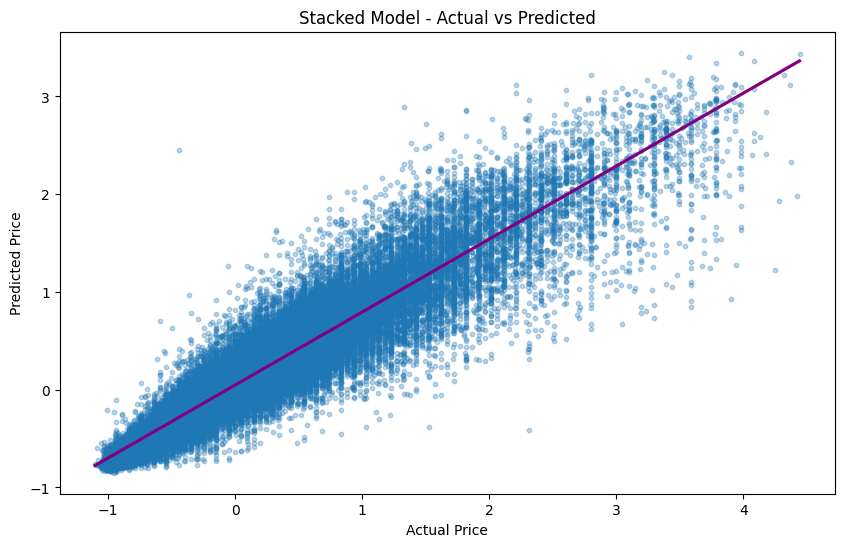

slice(None, None, None)


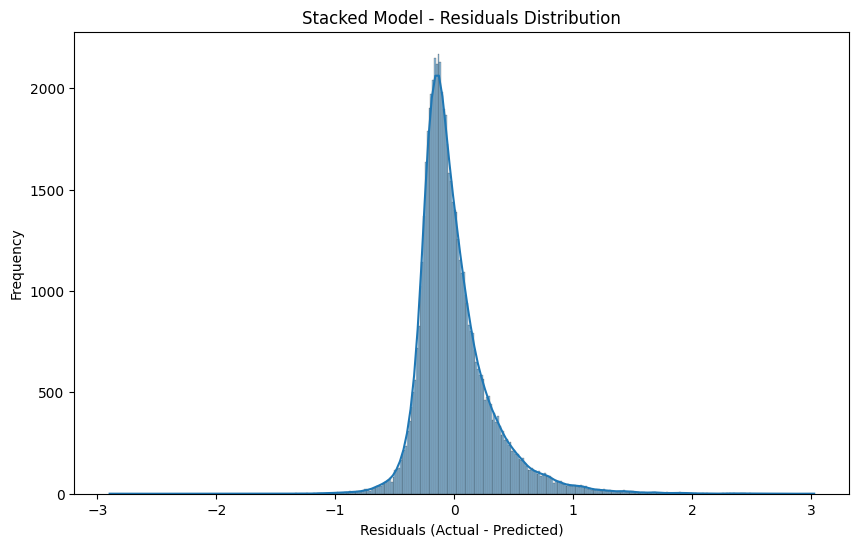

Mean Absolute Error (MAE): 0.22
Mean Squared Error (MSE): 0.10
R-squared (R2): 0.86
Explained Variance: 0.86


In [229]:
import seaborn as sns

def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    explained_var = explained_variance_score(y_true, y_pred)
    return mae, mse, r2, explained_var

def plot_actual_vs_predicted(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    sns.regplot(x=y_true, y=y_pred, scatter_kws={'s': 10, 'alpha': 0.3}, line_kws={'color': 'purple'})
    plt.title(f"{model_name} - Actual vs Predicted")
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.show()

def plot_residuals_distribution(residuals, model_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.title(f"{model_name} - Residuals Distribution")
    plt.xlabel("Residuals (Actual - Predicted)")
    plt.ylabel("Frequency")
    plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_projected, y, test_size=0.2, random_state=1)

# lasso = Lasso(**best_params_lasso)
# extra_trees = ExtraTreesRegressor(**best_params_extra_trees)
# lgbm = LGBMRegressor(**best_params_lgbm)
estimators = [('lasso', lasso), ('extra_trees', extra_trees), ('lgbm', lgbm)]

# Fixing lasso params issue to extract it from best params instead of hyperparameter tuning again. Takes too long
lasso_params = {k.split('__')[-1]: v for k, v in best_params_stacked.items() if k.startswith('lasso__')}

stacked_model = StackingRegressor(estimators=estimators, final_estimator=Lasso(**lasso_params))

stacked_model.fit(X_train, y_train)

stacked_pred = stacked_model.predict(X_test)

residuals = y_test - stacked_pred

mae, mse, r2, explained_var = regression_metrics(y_test, stacked_pred)

plot_actual_vs_predicted(y_test, stacked_pred, "Stacked Model")

plot_residuals_distribution(residuals, "Stacked Model")

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Explained Variance: {explained_var:.2f}")


In [211]:
results_df = pd.DataFrame({'Predicted': stacked_pred, 'Actual': y_test, 'Error': stacked_pred - y_test})


results_df


,Predicted,Actual,Error
314437,1.605811,1.130777,0.475034
251221,1.296718,1.819076,-0.522358
73309,-0.401748,-0.632153,0.230405
187409,-0.210750,-0.582596,0.371846
298284,0.363781,0.126942,0.236839
...,...,...,...
260284,0.890056,1.094395,-0.204340
157045,0.153665,0.441495,-0.287830
172306,0.801136,0.427729,0.373407
198277,0.459323,0.539823,-0.080500


In [231]:
results_df['Error'].describe()

count    64535.000000
mean         0.000216
std          0.311751
min         -2.798684
25%         -0.117513
50%          0.069467
75%          0.189044
max          3.040821
Name: Error, dtype: float64

In [212]:
print(f"\nMean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")



Mean Absolute Error (MAE): 0.2215080861390859
Mean Squared Error (MSE): 0.09718736930703319
R-squared (R2): 0.8612256177326892



# <font size = "5" style="color:purple; font-weight:bold;">Explaining using SHAP and LIME Tabular</span>

In [189]:
import shap

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = ExtraTreesRegressor(**best_params_extra_trees)
model.fit(X_train, y_train)

sample_X = X_test.sample(100, random_state=1)
explainer = shap.KernelExplainer(model.predict, sample_X)
shap_values = explainer.shap_values(X_test.sample(100, random_state=2))

  0%|          | 0/100 [00:00<?, ?it/s]

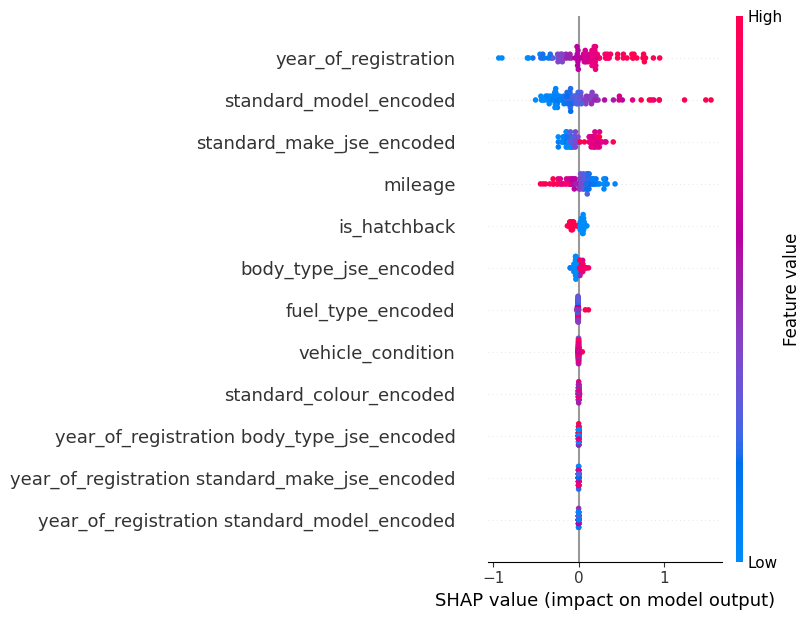

In [190]:
shap.summary_plot(shap_values, X_test.sample(100, random_state=2), title="Lasso Model")

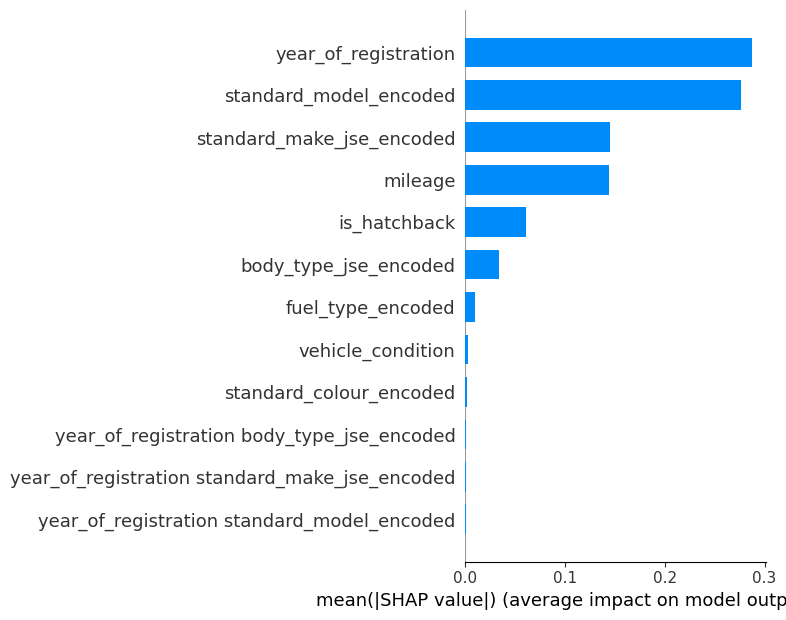

In [191]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [192]:
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])

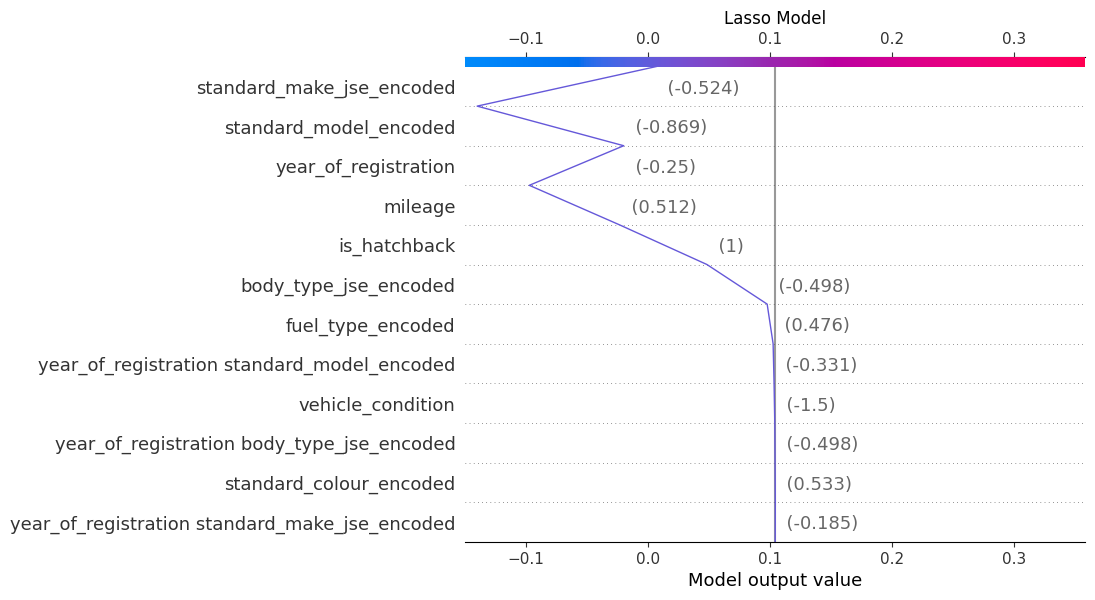

In [193]:
shap.decision_plot(explainer.expected_value, shap_values[0], X_test.iloc[0], title="Lasso Model")

In [196]:
from lime.lime_tabular import LimeTabularExplainer

sample_idx = 0
stacked_model = StackingRegressor(estimators=estimators, final_estimator=Lasso(alpha=0.1))  # CAN CHANGE FINAL ESTIMATOR
stacked_model.fit(X_train, y_train)

explainer = LimeTabularExplainer(X.values, feature_names=X.columns, mode='regression')
exp = explainer.explain_instance(X.iloc[1].values, stacked_model.predict, num_features=X.shape[1])
exp.show_in_notebook()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 258138, number of used features: 12
[LightGBM] [Info] Start training from score 0.185869
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad si


# <font size = "5" style="color:purple; font-weight:bold;">Partial Dependency Plots</span>

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1541
[LightGBM] [Info] Number of data points in the train set: 322673, number of used features: 10
[LightGBM] [Info] Start training from score 0.185317
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad si

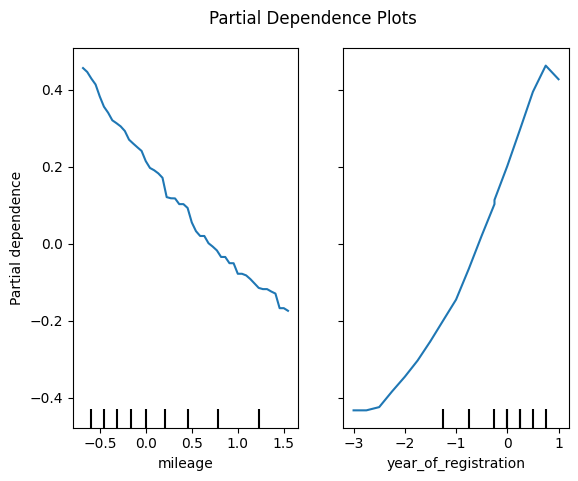

In [237]:
from sklearn.inspection import PartialDependenceDisplay

features = [0, 2]  # individual
# features = [(0, 1)]  # two-way

stacked_model.fit(X[X.columns[0:10]], y)

disp = PartialDependenceDisplay.from_estimator(stacked_model, X[X.columns[0:10]], features, grid_resolution=50)

plt.suptitle('Partial Dependence Plots')
plt.subplots_adjust(top=0.9)  # CAN ADJUST
plt.show()

(slice(None, None, None), 0)
(slice(None, None, None), 2)
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
(slice(None, None, None), 0)
(slice(None, None, None), 2)
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
(slice(None, None, None), 0)
(slice(None, None, None), 2)
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
(slice(None, None, None), 0)
(slice(None, None, None), 2)
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
(slice(None, None, None), 0)
(slice(None, None, None), 2)
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
(slice(None, None, None), 0)
(slice(None, None, None), 2)
[L

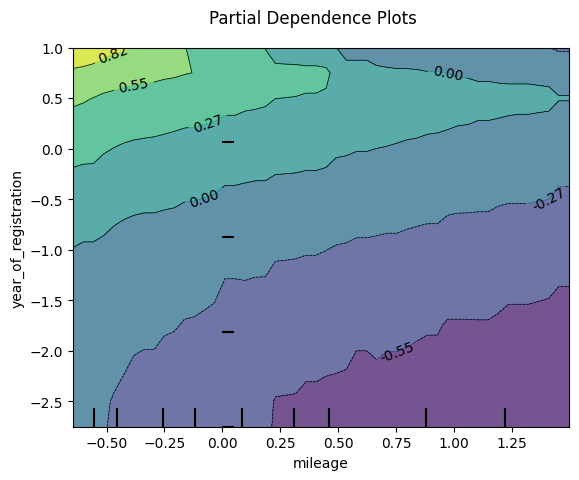

In [240]:
# features = [0, 1]  # individual
features = [(0, 2)]  # two-way

disp = PartialDependenceDisplay.from_estimator(stacked_model, X[X.columns[0:10]].sample(100), features, grid_resolution=50)

plt.suptitle('Partial Dependence Plots')
plt.subplots_adjust(top=0.9)  # CAN ADJUST
plt.show()

(slice(None, None, None), 0)
(slice(None, None, None), 1)
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
(slice(None, None, None), 0)
(slice(None, None, None), 1)
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
(slice(None, None, None), 0)
(slice(None, None, None), 1)
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
(slice(None, None, None), 0)
(slice(None, None, None), 1)
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
(slice(None, None, None), 0)
(slice(None, None, None), 1)
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
(slice(None, None, None), 0)
(slice(None, None, None), 1)
[L

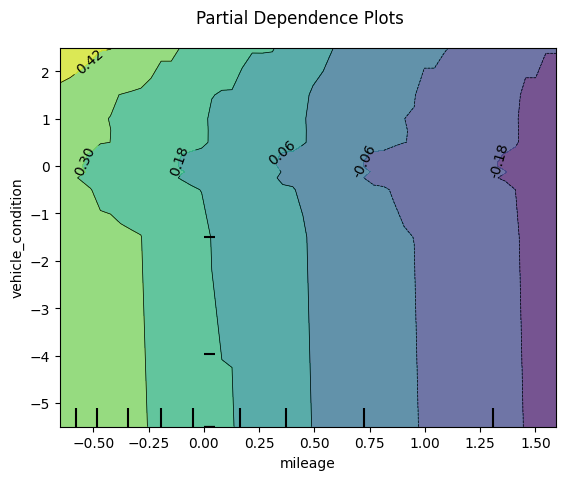

In [202]:
# features = [0, 1]  # individual
features = [(0, 1)]  # two-way

disp = PartialDependenceDisplay.from_estimator(stacked_model, X[X.columns[0:10]].sample(100), features, grid_resolution=50)

plt.suptitle('Partial Dependence Plots')
plt.subplots_adjust(top=0.9)  # CAN ADJUST
plt.show()